In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import yaml
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import precision_recall_curve, roc_curve, average_precision_score, roc_auc_score

%matplotlib inline

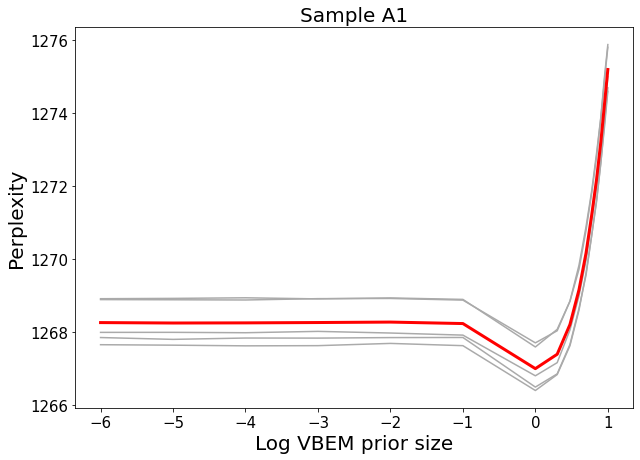

<AxesSubplot:title={'center':'Sample A1'}, xlabel='Log VBEM prior size', ylabel='Perplexity'>

In [14]:
perp_fp_fmt = '../seqc/output/seqc-bgi/perplexity_LGT/{sample}/vbprior={vb_prior}/{fold}/perplexity.yml'
VB_PRIORS = '1e-6 1e-5 1e-4 1e-3 1e-2 1e-1 1e0 2 3 4 5 6 7 8 9 1e1'.split()
def perplexity_plot(sample, vb_priors, folds):
    df = pd.DataFrame()
    for vb_prior in vb_priors:
        #folds_rhos = []
        for fold in range(1, folds + 1):
            with open(perp_fp_fmt.format(sample=sample, vb_prior=vb_prior, fold=fold), 'r') as f:
                perp_result = yaml.safe_load(f)
            #folds_rhos.append(rho)
            _vb_prior = float(vb_prior)
            df = df.append(dict(perplexity=perp_result['smoothed_perplexity'],
                                vb_prior=_vb_prior, log_vb_prior = np.log10(_vb_prior),
                                fold=fold), 
                           ignore_index=True)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ax.set_title(r'Sample {}{}'.format(sample[-3], sample[-1]), fontsize=20)
    sns.lineplot(x="log_vb_prior", y="perplexity", data=df, ax=ax, units="fold", estimator=None, color='#AAAAAA')
    sns.lineplot(x="log_vb_prior", y="perplexity", data=df, ax=ax, err_style=None, lw=3, color="red")
    
    ax.set_ylabel('Perplexity', fontsize=20)
    ax.set_xlabel('Log VBEM prior size', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)

#     plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

    plt.show()
    
    return ax
perplexity_plot('BGI_FC1_A_1', VB_PRIORS, 5)

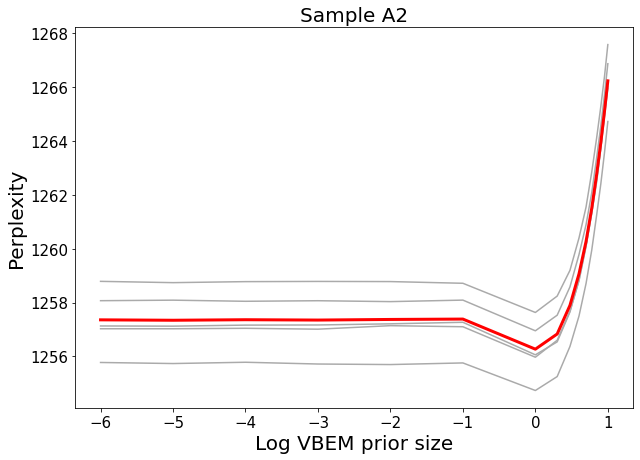

<AxesSubplot:title={'center':'Sample A2'}, xlabel='Log VBEM prior size', ylabel='Perplexity'>

In [16]:
perplexity_plot('BGI_FC1_A_2', VB_PRIORS, 5)